<a href="https://colab.research.google.com/github/Nilufayeasmin299/Covid19_US_data-for-Twitter_sentiment-analysis/blob/main/Covid19_US_data_for_SA_without_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#read csv file 
import pandas as pd
df = pd.read_csv("/content/gdrive/My Drive/project for paper /dataset/tencities_15days_april.csv")

In [ ]:
df.head()

,twitteDate,tweet_id,created_at,text,loc,user_id,verified,CleanedText,Subjectivity,Polarity,Analysis
0,2020-04-01,1245138809454395392,2020-04-01 00:00:00+00:00,thebsimone during corona stay clean fuck free ...,CA,u282394,0,thebsimon corona stay clean fuck free manit ki...,0.733333,-0.005556,Negative
1,2020-04-01,1245138809920126983,2020-04-01 00:00:00+00:00,balance joining fight against corona turning s...,CA,u460114,0,balanc join fight corona turn shoe product med...,0.000000,0.000000,Neutral
2,2020-04-01,1245138828622471168,2020-04-01 00:00:04+00:00,tory lanez asked young thug been staying coron...,WA,u127769,0,tori lanez ask young thug stay coronafre respo...,0.400000,0.100000,Positive
3,2020-04-01,1245138837057216518,2020-04-01 00:00:06+00:00,hasanthehun donald trump already trying spin c...,FL,u457103,0,hasanthehun donald trump alreadi tri spin coro...,0.000000,0.000000,Neutral
4,2020-04-01,1245138844766416896,2020-04-01 00:00:08+00:00,ghastly corona found into life affected family...,TX,u616396,0,ghast corona found life affect famili lost ano...,0.000000,0.000000,Neutral


In [ ]:
df.columns

Index(['twitteDate', 'tweet_id', 'created_at', 'text', 'loc', 'user_id',
       'verified', 'CleanedText', 'Subjectivity', 'Polarity', 'Analysis'],
      dtype='object')

### **Drop all columns except 'CleanedText' and 'Analysis'**

In [ ]:
tweets= df.drop(['twitteDate','tweet_id','created_at','text','loc','user_id','verified','Subjectivity','Polarity'],axis = 1)

In [ ]:
tweets.head()

,CleanedText,Analysis
0,thebsimon corona stay clean fuck free manit ki...,Negative
1,balanc join fight corona turn shoe product med...,Neutral
2,tori lanez ask young thug stay coronafre respo...,Positive
3,hasanthehun donald trump alreadi tri spin coro...,Neutral
4,ghast corona found life affect famili lost ano...,Neutral


In [ ]:
tweets.shape

(823002, 2)

In [ ]:
print(tweets.CleanedText[3])

hasanthehun donald trump alreadi tri spin corona death claim million peopl wouldv die noth


### **Let's now see the distribution of sentiments across all the tweets.**

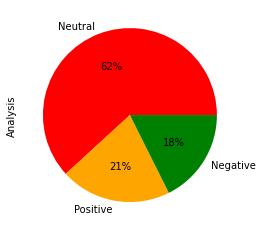

In [ ]:
tweets.Analysis.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "orange", "green"])

**Convert text into numeric**

In [ ]:
# convert Sentiment to numeric
sentiment_label = tweets.Analysis.factorize()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tweet = tweets.CleanedText.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(len(tokenizer.word_index))

427631


In [ ]:
print(tweet[0])
print(encoded_docs[0])

thebsimon corona stay clean fuck free manit kill germ tough germ tougher fuckboy
[3, 61, 1400, 11, 213, 23, 3257, 2237, 3257]


In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    3   61 1400   11  213
   23 

In [ ]:
#importing all necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32

### **Build LTSM model**

In [ ]:
num_labels=3
#define LTSM model
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           13684224  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 153       
Total params: 13,700,977
Trainable params: 13,700,977
Non-trainable params: 0
_________________________________________________________________
None


#### **Fit the LTSM model**

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],
                  validation_split=0.2, epochs=3, batch_size=32)

Epoch 1/3
20576/20576 [==============================] - 7438s 362ms/step - loss: 0.0710 - accuracy: 0.9808 - val_loss: 0.0543 - val_accuracy: 0.9870
Epoch 2/3
20576/20576 [==============================] - 7368s 358ms/step - loss: 0.0392 - accuracy: 0.9917 - val_loss: 0.0440 - val_accuracy: 0.9915
Epoch 3/3
15981/20576 [======================>.......] - ETA: 26:58 - loss: 0.0364 - accuracy: 0.9924Buffered data was truncated after reaching the output size limit.

**Bulid CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
#define CNN model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(Conv1D(50,5,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           13684224  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 32)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 50)           8050      
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
Total params: 13,692,427
Trainable params: 13,692,427
Non-trainable params: 0
__________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],
                  validation_split=0.2, epochs=2, batch_size=32)

Epoch 1/2
20576/20576 [==============================] - 3137s 152ms/step - loss: 0.0621 - accuracy: 0.9849 - val_loss: 0.0516 - val_accuracy: 0.9887
Epoch 2/2
20576/20576 [==============================] - 3105s 151ms/step - loss: 0.0373 - accuracy: 0.9925 - val_loss: 0.0460 - val_accuracy: 0.9892
